### PAGA

PAGA for pseudotime + trajectories for RNA data.

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from matplotlib import rcParams
import scanpy as sc

## Load data

### AnnData Obj (Seurat -> AnnData through sceasy)

In [77]:
rna = sc.read_h5ad("../20200828_RNA_Seurat/sessions/20200913_n59369/seurat.h5ad")

In [82]:
rna

AnnData object with n_obs × n_vars = 59369 × 27632
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample', 'percent.mt', 'selected', 'percent.or', 'RNA_snn_res.1', 'seurat_clusters', 'RNA_snn_res.0.5'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    obsm: 'X_pca', 'X_umap'

### Cluster Config

In [83]:
cluster_config = pd.read_csv("../../figures_factory/configs/cluster.tsv", sep='\t')
cluster_config

,cluster,colour,description,new_cluster
0,1,#A6D854,Pre-iPSC,14
1,2,#F0A118,Intermediate,12
2,3,#E85F6D,Fibroblast-like,3
3,4,#006658,Neural-like,8
4,5,#B03743,Fibroblast,1
5,6,#CF175A,Fibroblast-like,4
6,7,#78A824,Pre-iPSC,13
7,8,#F4D5CD,Intermediate,11
8,9,#D4B81C,Intermediate,9
9,10,#F01D35,Fibroblast-like,5


### ATAC Transfer Labels

In [84]:
atac_rna_label = pd.read_csv("../20200828_RNA_Seurat/sessions/20200913_n59369/atac.20201022_n53906.cluster.transfer.tsv", sep='\t')

print(all(atac_rna_label['barcode']==rna.obs.index)) 

# transfer to new cluster idxs
atac_rna_label['atac_new_cluster'] = list(cluster_config.iloc[atac_rna_label['atac_cluster']-1]["new_cluster"])

atac_rna_label.head()

True


,barcode,sample,atac_cluster,atac_new_cluster
0,AAACCCAAGAGTGACC-1,D0,5,1
1,AAACCCAAGTGCCAGA-1,D0,5,1
2,AAACCCACACCATTCC-1,D0,5,1
3,AAACCCACACGCGTCA-1,D0,5,1
4,AAACCCAGTCCATAGT-1,D0,5,1


In [85]:
atac_rna_label["atac_new_cluster"]

0         1
1         1
2         1
3         1
4         1
         ..
59364    14
59365    14
59366     5
59367    14
59368    14
Name: atac_new_cluster, Length: 59369, dtype: int64

In [86]:
rna.obs["atac_transfer_cluster"] = list([str(x) for x in atac_rna_label["atac_new_cluster"]])

In [87]:
rna.obs

,nCount_RNA,nFeature_RNA,sample,percent.mt,selected,percent.or,RNA_snn_res.1,seurat_clusters,RNA_snn_res.0.5,atac_transfer_cluster
AAACCCAAGAGTGACC-1,12431.0,3300,D0,4.231357,0.0,0.0,0,0,0,1
AAACCCAAGTGCCAGA-1,11132.0,3304,D0,5.821056,1.0,0.0,0,0,0,1
AAACCCACACCATTCC-1,13101.0,3788,D0,4.121823,0.0,0.0,7,0,0,1
AAACCCACACGCGTCA-1,7944.0,2612,D0,4.770896,1.0,0.0,0,0,0,1
AAACCCAGTCCATAGT-1,10934.0,3080,D0,6.036217,0.0,0.0,7,0,0,1
...,...,...,...,...,...,...,...,...,...,...
TTTGTTGGTCCTGGTG-8,11675.0,3241,D14,13.678801,0.0,0.0,8,7,7,14
TTTGTTGGTCGTTATG-8,19498.0,4105,D14,6.385270,0.0,0.0,8,7,7,14
TTTGTTGGTCTGTCAA-8,9651.0,3197,D14,6.652160,0.0,0.0,11,12,12,5
TTTGTTGTCCCTGGTT-8,18084.0,4037,D14,7.039372,0.0,0.0,1,10,10,14


In [88]:
# TEMP (Remove cell states not present in RNA)
# rna = rna[~rna.obs['atac_transfer_cluster'].isin(['8', '10', '17'])].copy()

In [111]:
rna.obs

,nCount_RNA,nFeature_RNA,sample,percent.mt,selected,percent.or,RNA_snn_res.1,seurat_clusters,RNA_snn_res.0.5,atac_transfer_cluster,dpt_pseudotime
AAACCCAAGAGTGACC-1,12431.0,3300,D0,4.231357,0.0,0.0,0,0,0,1,0.000000
AAACCCAAGTGCCAGA-1,11132.0,3304,D0,5.821056,1.0,0.0,0,0,0,1,0.011337
AAACCCACACCATTCC-1,13101.0,3788,D0,4.121823,0.0,0.0,7,0,0,1,0.044642
AAACCCACACGCGTCA-1,7944.0,2612,D0,4.770896,1.0,0.0,0,0,0,1,0.013175
AAACCCAGTCCATAGT-1,10934.0,3080,D0,6.036217,0.0,0.0,7,0,0,1,0.022315
...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGGTCCTGGTG-8,11675.0,3241,D14,13.678801,0.0,0.0,8,7,7,14,0.483020
TTTGTTGGTCGTTATG-8,19498.0,4105,D14,6.385270,0.0,0.0,8,7,7,14,0.492762
TTTGTTGGTCTGTCAA-8,9651.0,3197,D14,6.652160,0.0,0.0,11,12,12,5,0.370205
TTTGTTGTCCCTGGTT-8,18084.0,4037,D14,7.039372,0.0,0.0,1,10,10,14,0.576314


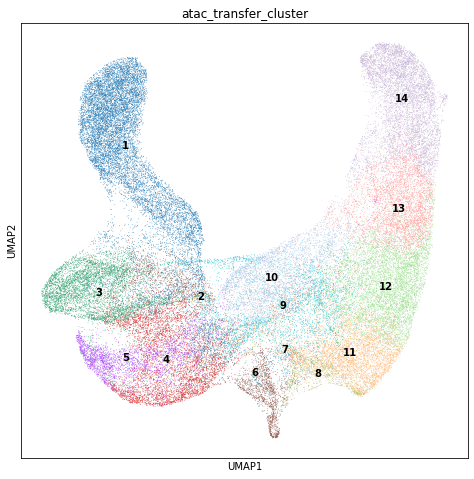

In [108]:
rcParams['figure.figsize'] = 8, 8

sc.pl.umap(rna, color="atac_transfer_cluster", legend_loc='on data')

## Trajectory

In [91]:
sc.pp.neighbors(rna, n_neighbors=15, n_pcs=30)

In [92]:
sc.tl.paga(rna, groups='atac_transfer_cluster')

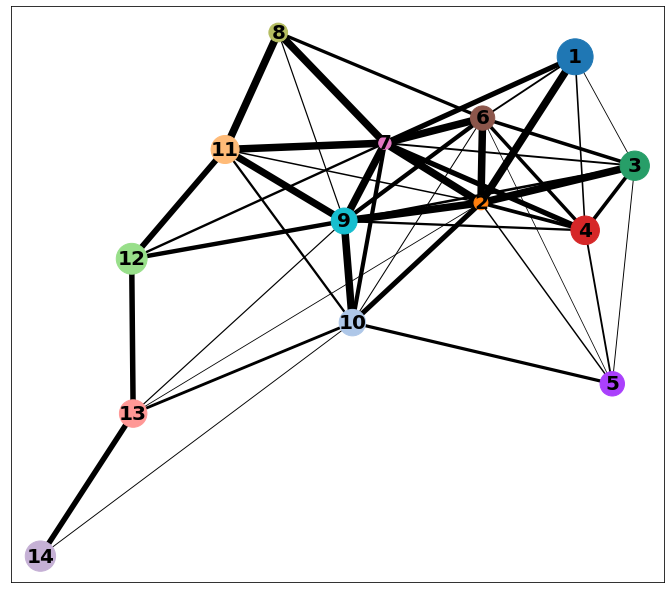

In [93]:
rcParams['figure.figsize'] = 10, 10

sc.pl.paga(rna, 
           threshold=.1, 
           fontsize=20, 
           node_size_scale=5,
#            solid_edges='connectivities_tree',
           show=True)

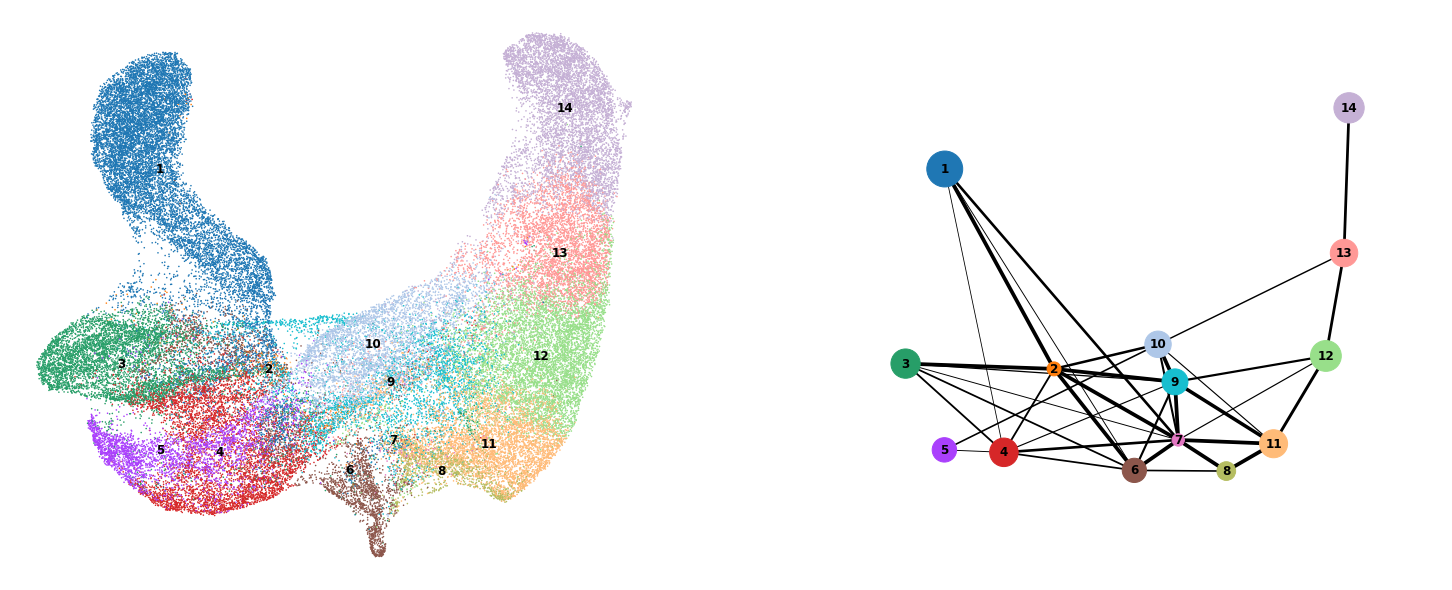

In [95]:
sc.pl.paga_compare(
    rna, threshold=0.2, title='', right_margin=0.2, size=10, edge_width_scale=0.5,
    legend_fontsize=12, frameon=False, edges=False, save=True,
    fontsize=20, 
    node_size_scale=5)

### Pseudotime

In [96]:
rna.uns['iroot'] = np.flatnonzero(rna.obs['atac_transfer_cluster']  == '1')[0]
rna.uns['iroot']

0

In [97]:
sc.tl.dpt(rna)

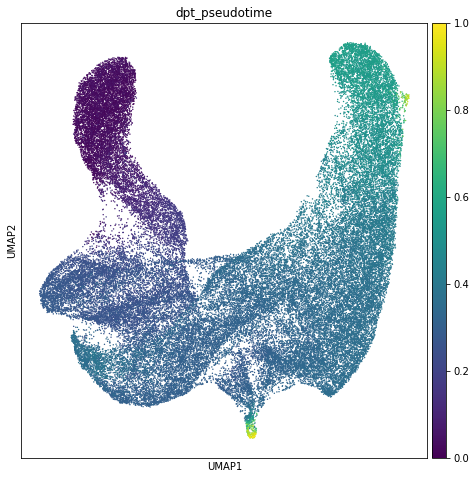

In [98]:
rcParams['figure.figsize'] = 8, 8

sc.pl.umap(rna, color=['dpt_pseudotime'], 
           size=8, 
           legend_loc='on data')

## Write Session Outputs

In [103]:
SESH_NAME = "20201022_n{}_ATAC_20201022_n53906".format(rna.shape[0])
SESH_NAME

'20201022_n59369_ATAC_20201022_n53906'

In [107]:
(conn>0.2).sum().sum()

72

In [104]:
# write PAGA connectivities matrix
conn = pd.DataFrame(rna.uns['paga']['connectivities'].todense(), 
                    index=[f'c{x}' for x in rna.obs['atac_transfer_cluster'].dtype.categories],
                    columns=[f'c{x}' for x in rna.obs['atac_transfer_cluster'].dtype.categories])
conn

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14
c1,0.000000,1.000000,0.112080,0.215234,0.013961,0.247925,0.697359,0.030293,0.053066,0.008082,0.013249,0.001223,0.000775,0.000891
c2,1.000000,0.000000,1.000000,0.493893,0.194631,1.000000,1.000000,0.079781,1.000000,0.675225,0.198986,0.007531,0.110825,0.009220
c3,0.112080,1.000000,0.000000,0.485001,0.126454,0.471417,0.253713,0.016803,0.342084,0.059272,0.033667,0.012435,0.009809,0.001717
c4,0.215234,0.493893,0.485001,0.000000,0.246968,0.462764,0.703626,0.002285,0.306976,0.049820,0.012030,0.027050,0.015820,0.000264
c5,0.013961,0.194631,0.126454,0.246968,0.000000,0.100665,0.039779,0.000000,0.047967,0.430173,0.001682,0.003895,0.019247,0.002455
c6,0.247925,1.000000,0.471417,0.462764,0.100665,0.000000,1.000000,0.438588,0.568821,0.137826,0.072319,0.050089,0.002422,0.008943
c7,0.697359,1.000000,0.253713,0.703626,0.039779,1.000000,0.000000,1.000000,1.000000,0.557161,1.000000,0.317438,0.060480,0.070615
c8,0.030293,0.079781,0.016803,0.002285,0.000000,0.438588,1.000000,0.000000,0.160975,0.054781,1.000000,0.061019,0.000000,0.007501
c9,0.053066,1.000000,0.342084,0.306976,0.047967,0.568821,1.000000,0.160975,0.000000,1.000000,0.942324,0.587265,0.159019,0.043518
c10,0.008082,0.675225,0.059272,0.049820,0.430173,0.137826,0.557161,0.054781,1.000000,0.000000,0.305941,0.084080,0.382917,0.124575


In [105]:
conn.to_csv(f"./sessions/{SESH_NAME}/connectivities.tsv", sep='\t')